In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-blackscholes-unstable)

Let's try to do everything the same as in {numref}`Demo {number} <demo-blackscholes-solve>`, but extending the simulation time to $T=8$.

In [2]:
Smax = 8
K = 3
sigma = 0.06
r = 0.08
m = 200
h = Smax / m
x = h * arange(m+1)

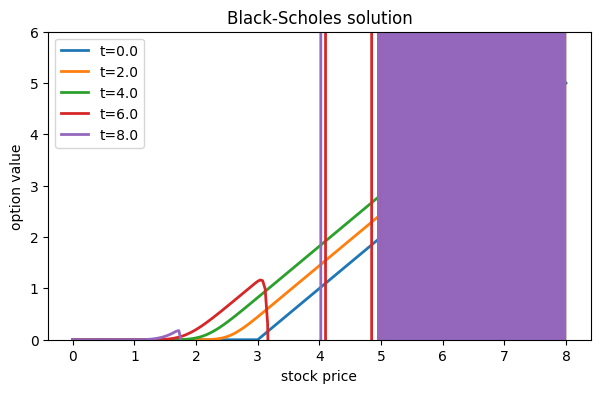

In [3]:
T = 8
n = 1000;  tau = T / n
t = tau * arange(n + 1)
lamb, mu = tau / h**2, tau / h

V = zeros([m+1, n+1])
V[:, 0] = maximum(0, x - K)
for j in range(n):
    # Fictitious value from Neumann condition.
    Vfict = 2 * h + V[m - 1, j]
    Vj = hstack([V[:, j], Vfict])
    # First row is zero by the Dirichlet condition.
    for i in range(1, m + 1):
        diff1 = Vj[i + 1] - Vj[i - 1]
        diff2 = Vj[i + 1] - 2 * Vj[i] + Vj[i - 1]
        V[i, j + 1] = (
            Vj[i]
            + (lamb * sigma**2 * x[i] ** 2 / 2) * diff2
            + (r * x[i] * mu) / 2 * diff1
            - r * tau * Vj[i]
        )

select_times = 250 * arange(5)
show_times = t[select_times]

for j, col in enumerate(select_times):
    plot(x, V[:, col], label=f"t={show_times[j]:.1f}")

legend()
xlabel("stock price")
ylim([0, 6]);  ylabel("option value")
title("Black-Scholes solution");

In [4]:
from matplotlib.animation import FuncAnimation
fig = figure()
ax = fig.add_subplot(autoscale_on=False, xlim=(0, 8), ylim=(0, 6))
ax.grid()
ax.set_title("Black-Scholes solution...?")

line, = ax.plot([], [], '-', lw=2)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def animate(j):
    line.set_data(x, V[:, j])
    time_text.set_text(f"t = {t[j]:.2f}")
    return line, time_text

anim = FuncAnimation(fig, animate, frames=range(0, n+1, 10), blit=True);
anim.save("black-scholes-8.mp4", fps=30)
close()

This so-called solution is nonsense!